In [2]:
import os
import pickle
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle

In [19]:
# 1

import pandas as pd
import pickle

def run_model(model_file, testing_features_file):
    # Load the trained model from the pickle file
    with open(model_file, 'rb') as file:
        model = pickle.load(file)

    # Load the testing features from the pickle file
    testing_features = pd.read_pickle(testing_features_file)

    # Verify if the "word" and "complex_binary" columns are present in the testing features
    required_columns = ['word', 'complex_binary']
    missing_columns = [col for col in required_columns if col not in testing_features.columns]
    if missing_columns:
        raise KeyError(f"The testing features do not have the following required columns: {', '.join(missing_columns)}")

    # Extract the required feature columns for prediction
    feature_columns = ['syllables', 'characters', 'vowels', 'simple_wiki_freq', 'HIT_count', 'absTotalMatchCount', 'relTotalMatchCount']

    # Check if there are any missing values in the feature columns
    missing_values = testing_features[feature_columns].isnull().sum()
    if missing_values['absTotalMatchCount'] > 0:
        print("Words with missing values in 'absTotalMatchCount':")
        missing_words = testing_features.loc[testing_features['absTotalMatchCount'].isnull(), 'word']
        print(missing_words)

    # Change "NaN" values to 0 in the feature columns
    testing_features[feature_columns] = testing_features[feature_columns].fillna(0)

    # Extract the required feature columns for prediction
    features = testing_features[feature_columns].values

    # Make predictions using the trained model
    y_pred = model.predict(features)

    # Extract the true labels from the "complex_binary" column
    y_true = testing_features['complex_binary'].values

    # Create a DataFrame to store the predictions and true labels
    data = {'Word': testing_features['word'],
            'Prediction': y_pred,
            'True Label': y_true}
    predictions_df = pd.DataFrame(data)

    return predictions_df

# Define the model files and testing features file
model_files = ['lmodel/Wikipedia_model.pkl', 'lmodel/WikiNews_model.pkl', 'lmodel/News_model.pkl', 'lmodel/Combined_model.pkl']
testing_features_file = 'features_NEW/combined_Dev.pkl'

# Run the models and store the predictions in separate DataFrames
predictions_dfs = []
for model_file in model_files:
    predictions_df = run_model(model_file, testing_features_file)
    predictions_dfs.append(predictions_df)

# Print the predictions DataFrames for each model
for i, predictions_df in enumerate(predictions_dfs):
    print(f"Predictions for Model {i+1}:")
    print(predictions_df)
    print()


Words with missing values in 'absTotalMatchCount':
8                 sparking intense clashes
30     internationally brokered peace plan
130                      Arriving deputies
167                  Sheikh Abbas al-Laham
168                         Abbas al-Laham
                      ...                 
628                literally , non-duality
662       Supreme Cosmic Spirit or Brahman
669                    Paramarthika Satyam
672                    Perceptible feeling
677                           turīya state
Name: word, Length: 88, dtype: object
Words with missing values in 'absTotalMatchCount':
8                 sparking intense clashes
30     internationally brokered peace plan
130                      Arriving deputies
167                  Sheikh Abbas al-Laham
168                         Abbas al-Laham
                      ...                 
628                literally , non-duality
662       Supreme Cosmic Spirit or Brahman
669                    Paramarthika Satyam


In [20]:
#2

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_predictions(model_names, testing_file, predictions_dfs):
    # Create an empty list to store the evaluation metrics for each model
    evaluation_list = []

    for model_name, predictions_df in zip(model_names, predictions_dfs):
        # Skip the first row (header)
        predictions_df = predictions_df.iloc[1:].copy()

        # Convert the Prediction and True Label columns to integers
        predictions_df['Prediction'] = predictions_df['Prediction'].astype(int)
        predictions_df['True Label'] = predictions_df['True Label'].astype(int)

        # Extract the predicted labels and true labels from the DataFrame
        y_pred = predictions_df['Prediction']
        y_true = predictions_df['True Label']

        # Calculate the evaluation scores
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='binary', pos_label=1)
        recall = recall_score(y_true, y_pred, average='binary', pos_label=1)
        f_score = f1_score(y_true, y_pred, average='binary', pos_label=1)

        # Create a confusion matrix
        confusion = confusion_matrix(y_true, y_pred)

        # Create a DataFrame for the confusion matrix
        labels = ['Negative', 'Positive']
        confusion_df = pd.DataFrame(confusion, index=labels, columns=labels)

        # Calculate the true positives, false positives, true negatives, and false negatives
        tp = confusion_df.loc['Positive', 'Positive']
        fp = confusion_df.loc['Negative', 'Positive']
        tn = confusion_df.loc['Negative', 'Negative']
        fn = confusion_df.loc['Positive', 'Negative']

        # Create a dictionary to store the evaluation scores, confusion matrix, and additional metrics
        evaluation = {
            'Model': model_name,
            'Testing File': testing_file,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F-Score': f_score,
            'True Positive': tp,
            'False Positive': fp,
            'True Negative': tn,
            'False Negative': fn,
            'Confusion Matrix': confusion_df
        }

        # Append the evaluation dictionary to the list
        evaluation_list.append(evaluation)

        # Generate a heatmap of the confusion matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(confusion_df, annot=True, cmap='Blues', fmt='d')
        plt.title(f'Confusion Matrix - {model_name}')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

    # Create a DataFrame to store the combined evaluation metrics
    evaluation_df = pd.DataFrame(evaluation_list)

    return evaluation_df


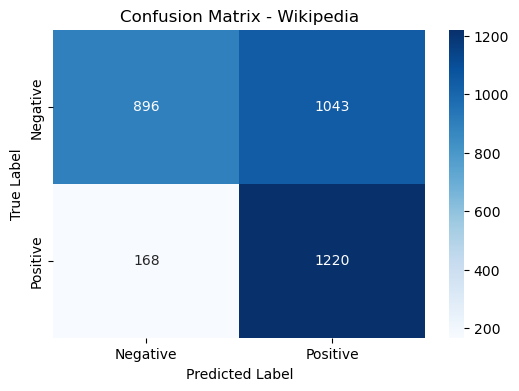

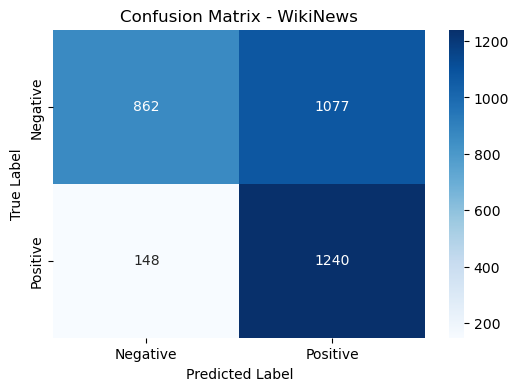

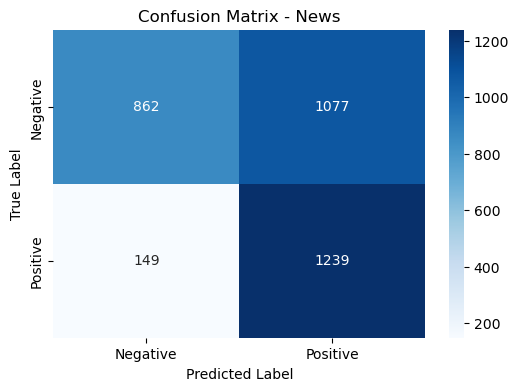

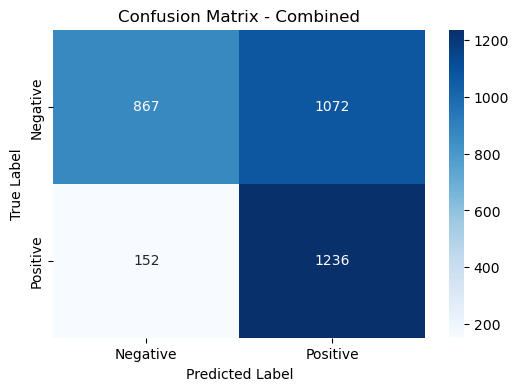


Combined Evaluation Metrics:

       Model                   Testing File  Accuracy  Precision    Recall  \
0  Wikipedia  features_NEW/combined_Dev.pkl  0.636008   0.539107  0.878963   
1   WikiNews  features_NEW/combined_Dev.pkl  0.631800   0.535175  0.893372   
2       News  features_NEW/combined_Dev.pkl  0.631500   0.534974  0.892651   
3   Combined  features_NEW/combined_Dev.pkl  0.632101   0.535529  0.890490   

    F-Score  True Positive  False Positive  True Negative  False Negative  \
0  0.668310           1220            1043            896             168   
1  0.669366           1240            1077            862             148   
2  0.669006           1239            1077            862             149   
3  0.668831           1236            1072            867             152   

                                    Confusion Matrix  
0            Negative  Positive
Negative       89...  
1            Negative  Positive
Negative       86...  
2            Negative  Posi

In [21]:
#3
model_names = ["Wikipedia", "WikiNews", "News", "Combined"]
testing_file = testing_features_file
evaluation_df = evaluate_predictions(model_names, testing_file, predictions_dfs)

# Print the combined evaluation metrics DataFrame
print("\nCombined Evaluation Metrics:\n")
print(evaluation_df)


In [22]:
# 4 Extract the first name of the testing features file
testing_file_name = testing_file[0].split("/")[-1].split(".")[0]

# Print the LaTeX format of the table
print("\\begin{table}\n")
print("\\begin{tabular}{|c|c|c|c|c|}")
print("\hline")
print("Model Name &  Accuracy &  Precision &    Recall &   F-Score \\\\")
print("\hline")

for index, row in evaluation_df.iterrows():
    model_name = row['Model']
    accuracy = row['Accuracy']
    precision = row['Precision']
    recall = row['Recall']
    f_score = row['F-Score']

    print(f"{model_name} & {accuracy:.6f} & {precision:.6f} & {recall:.6f} & {f_score:.6f} \\\\")

print("\hline")
print("\end{tabular}")
print(f"\caption{{Results tested on {testing_features_file} data set}}")
print(f"\label{{{testing_features_file}_Model_baseline}}")
print("\end{table}")



\begin{table}

\begin{tabular}{|c|c|c|c|c|}
\hline
Model Name &  Accuracy &  Precision &    Recall &   F-Score \\
\hline
Wikipedia & 0.636008 & 0.539107 & 0.878963 & 0.668310 \\
WikiNews & 0.631800 & 0.535175 & 0.893372 & 0.669366 \\
News & 0.631500 & 0.534974 & 0.892651 & 0.669006 \\
Combined & 0.632101 & 0.535529 & 0.890490 & 0.668831 \\
\hline
\end{tabular}
\caption{Results tested on features_NEW/combined_Dev.pkl data set}
\label{features_NEW/combined_Dev.pkl_Model_baseline}
\end{table}
